# ***Pagerank algorithm*** using dynamic programming

In [1]:
# import necessary packages
import numpy as np
from numpy import  linalg
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")  

In this notebook, I'm going to use the same micro-internet that used to be my assignment in coursera's course.<br>
<br>
![](image/pic.png)<br>
<br>
<a href="https://www.coursera.org/learn/multivariate-calculus-machine-learning?skipBrowseRedirect=true">Image's Source</a>

Each node in the image represent a web-page and its edge(arrow pointing out or in) is the hyperlink to other.<br>
To put it simple, pagerank algorithm is the algorithm that will simulate that if there were a 100 random web surfer (who when reaching a page, goes to the next page via the links) what would be the number of the web surfer in each web-page in the long run (when the number of entering and leaving the web is constant which is the equilibrium state defined in Markov Chains).<br>

(The above idea if from my understanding if ther is any incorrect information, please infrom me)


Obviously, in the long run, the web-page that has the highest number of visitors will be ranked the most important and appear in the top of the search.

The quation below represent the dynamic behavior of this algorithm.

$$ \mathbf{r}^{(i+1)} = T \,\mathbf{r}^{(i)} \,\,\, for\,\,i=0,1,2,...$$
which  $\mathbf{r}^{i+1}$ is a vector of a wab-page's ranking at time i (but this will not be at the starting of the process but afther a while ->> approaching an equilibrium).<br>
$T$ is what we call **trainsition matrix** will each columns will represent the probability of leaving a website for any other website which will sum to 1. The rows are the opposite but need not to sum to 1.<br>
$\mathbf{r}^{0}$ is a vector of initial ranking (or you can call **initial state** in Markov Chain) of all web-page which, in this case, I will assume that every web-page is ranked equally (which is widely use in simple pagerank).

From Linear algebra's prespective, when the system is at equilibrium state the equation will be $$\mathbf{r}=T\,\mathbf{r}$$ which r will be your **eigenvector** that has eigenvalue = 1 (which one will be the largest eigenvalue according to Frobinius-Perron theorem).<br>
In other words, you can thinks of this as looping the equation (multiplying $\mathbf{r}^{0}$ many time by transition matrix) until you find the eigenvector with eigenvalue equal to 1. This method is called **power iteration method**.

# NOW...

Because of the recursive nature of the above equation, I thought to myself that this would be a good time for me to practive writing dynamic programming (and a little bit of recursive function).<br>
SO, in this notebook, I will demonstrate the Pagerank algorithm in my style of dynamic programming both in bottom-up and top-down manner.

In [2]:
T = np.array([[0,   1/2, 1/3, 0, 0,   0],
              [1/3, 0,   0,   0, 1/2, 0],
              [1/3, 1/2, 0,   1, 0,   1/2],
              [1/3, 0,   1/3, 0, 1/2, 1/2],
              [0,   0,   0,   0, 0,   0],
              [0,   0,   1/3, 0, 0,   0]])
# Transition matrix coresponding to my micro-internet
r_0 = 100 * np.ones(6) / 6 # initial ranking vector, assumed random web surfer 100 in this micor-internet

# The basic idea of dynamic programming is to store the result of a problem after solving it. So when we get the need to use the solution of the problem, then we don't have to solve the problem again and just use the stored solution. [(source)](https://www.codesdope.com/course/algorithms-dynamic-programming/)


In [3]:
# bottom-up -> TABULATION
def page_rank_tabulation(transition_matrix, initial_vec, iteration=100):
    vec_container = [0]*iteration
    vec_container[0] = initial_vec
    for i in range(1, iteration):
        vec_container[i] = transition_matrix @ vec_container[i-1]
        if np.absolute(linalg.norm(vec_container[i] - vec_container[i-1])) < 0.001:
            return vec_container
    return vec_container

In [4]:
vectors = page_rank_tabulation(T, r_0, 30)
print(vectors)

[array([16.66666667, 16.66666667, 16.66666667, 16.66666667, 16.66666667,
       16.66666667]), array([13.88888889, 13.88888889, 38.88888889, 27.77777778,  0.        ,
        5.55555556]), array([19.90740741,  4.62962963, 42.12962963, 20.37037037,  0.        ,
       12.96296296]), array([16.35802469,  6.63580247, 35.80246914, 27.16049383,  0.        ,
       14.04320988]), array([15.25205761,  5.4526749 , 42.9526749 , 24.40843621,  0.        ,
       11.93415638]), array([17.04389575,  5.0840192 , 38.18587106, 25.36865569,  0.        ,
       14.3175583 ]), array([15.27063329,  5.68129858, 40.75074303, 25.56870142,  0.        ,
       12.72862369]), array([16.4242303 ,  5.0902111 , 39.86387365, 25.03810395,  0.        ,
       13.58358101]), array([15.83306343,  5.47474343, 39.84974343, 25.55449182,  0.        ,
       13.28795788]), array([16.02061953,  5.27768781, 40.21353029, 25.20491456,  0.        ,
       13.28324781]), array([16.043354  ,  5.34020651, 39.82558888, 25.38634051, 

In the below cell, we have the simulated number of random web surfer when the system reached equilibrium state. You can clearly see the web **C** has the highest ranking among the others (which is reasonable if you look back to the image), so it will come up 1st place in your search.

In [5]:
vectors = [vector for vector in vectors if isinstance(vector, np.ndarray)]
print(vectors[-1])

[16.0001384   5.33328028 39.99981362 25.33331079  0.         13.33345691]


Text(0.5, 1.0, 'Result from Pagrrank algorithm')

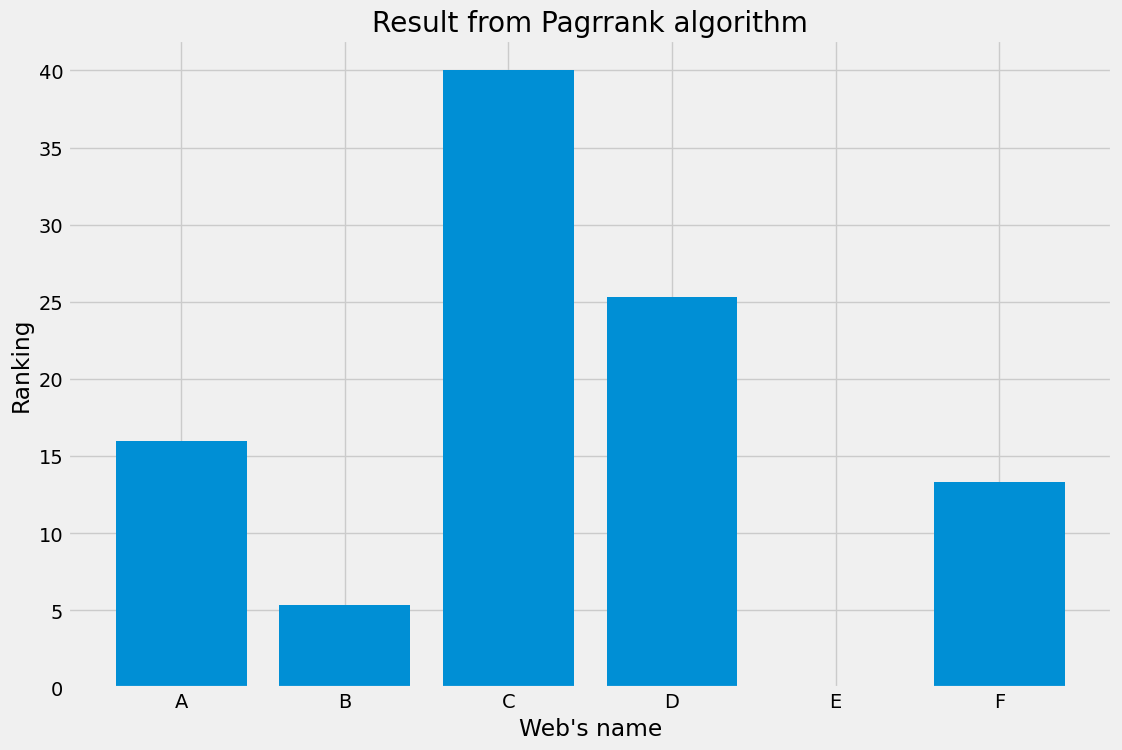

In [6]:
fig = plt.figure(figsize=(12, 8), dpi=100)
plt.bar(x=["A", "B", "C", "D", "E", "F"], height=vectors[-1])
plt.xlabel("Web's name")
plt.ylabel("Ranking")
plt.title("Result from Pagrrank algorithm")

In [7]:
# top-down approach ->> MEMOIZATION
vec_container = [0] * 100
def page_rank_memoization(n=100):
    if n==0:
        vec_container[0] = r_0
    else:
        vec_container[n] = T @ page_rank_memoization(n-1) # recursive

    return vec_container[n]

In [8]:
eigenvector = page_rank_memoization(50)
print(eigenvector)

[16.          5.33333333 40.         25.33333333  0.         13.33333333]


Note the my top-down approach code is not a good code at all (LOL) because I couldn't figure out how to write exiting condition in that function (I will try again someday...) and that made the result a bit different from the bottom-up approach.

# END